# 가위바위보 분류기

In [21]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# 라이브러리 불러오기

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

## 데이터 불러오기 + Resize 하기

In [23]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


#  3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

In [24]:
#  3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

import numpy as np
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


- 이미지 불러와보기

라벨:  0


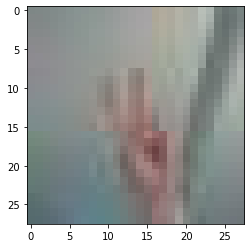

In [25]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계하기

In [26]:
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np

# # model을 직접 만들어 보세요.
# # Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

# print('Model에 추가된 Layer 개수: ', len(model.layers))
# model.summary()

In [27]:
n_channel_1=16
n_channel_2=128
n_channel_3=64
n_channel_4=32
n_dense=16
n_train_epoch=5

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (2,2), activation='softsign', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2),padding='same'))
model.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='softsign'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2),padding='same'))
model.add(keras.layers.Conv2D(n_channel_3, (2,2), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (1,1), strides = (2,2),padding='same'))

model.add(keras.layers.Conv2D(n_channel_4, (2,2), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  11
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 27, 27, 16)        208       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 128)       8320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 64)          32832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           

# test 데이터 resize  

In [28]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


# 딥러닝 네트워크 학습시키기

In [29]:
# model을 학습시키는 코드를 직접 작성해 보세요.
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


- 모델 훈련 

In [30]:
# model.compile()과 model.fit() 사용
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 5ms/step - loss: 1.0985 - accuracy: 0.3367
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0948 - accuracy: 0.3333
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0880 - accuracy: 0.3333
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 1.0779 - accuracy: 0.4300
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0624 - accuracy: 0.4733
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0295 - accuracy: 0.5633
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.9948 - accuracy: 0.5567
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.9438 - accuracy: 0.5867
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.8896 - accuracy: 0.6500
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.8033 - accuracy: 0.7133


# 얼마나 잘 만들었는지 확인하기(테스트)

In [31]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0 레이블링은 이렇게 하는가 보다. 
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


- 모델 test accuracy 측정

In [32]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_train, y_train, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.6400
test_loss: 1.0972847938537598 
test_accuracy: 0.6399999856948853
